In [1]:
#Import in needed packages
import glob
import os
import networkx as nx
import numpy as np
import string
from hw2skeleton import cluster
from hw2skeleton import io
from hw2skeleton import utils
import random



In [3]:
#Read all the active sties
active_sites_list = io.read_active_sites("/Users/elizabeth/Desktop/hw2-skeleton/data")

Read in 136 active sites


In [5]:
#Creating distance matrix
d = np.zeros((136,136))
             
for i in range(136):
    for j in range(i,136):
        d[i,j] = cluster.compute_similarity(active_sites_list[i], active_sites_list[j])
        d[j,i] = d[i,j]

In [6]:
#Create a function to evaluate the sse for a range of k (To use to make an elbow plot)
def evaluate_k(active_sites,k_min,k_max,n):
    k_result = []
    sse_result = []
    sse_std = []
    
    for k in range(k_min,(k_max+1)):
        k_result.append(k)
        sse_mean_list = []
        for i in range(n):
            clusters = cluster.cluster_by_partitioning(active_sites,k)
            sse = 0
            index = 0
            for cluster in clusters:
                centroid = centroids[index]
                for site in cluster:
                    sse = sse + d[site,centroid]**2
                index = index+1
            if sse != 0:
                sse_mean_list.append(sse)
        sse_result.append(np.mean(sse_mean_list))
        sse_std.append(np.std(sse_mean_list))
    return k_result, sse_result, sse_std
    
            

In [10]:
#Calculate the silhouette for a site for a given clustering
def silhouette(site,clustering,number_of_sites):
    sil = 0
    b_i = number_of_sites
    for cluster in clustering:
        if site in cluster:
            if len(cluster) == 1:
                return sil
            else:
                a_i_list = [d[site,other_site] for other_site in cluster if other_site != site]
                a_i =np.mean(a_i_list)
        else:
            b_i_list = [d[site,other_site] for other_site in cluster]
            b_i_new =np.mean(b_i_list)
            if b_i_new < b_i:
                b_i = b_i_new
    sil = (b_i - a_i)/max(a_i,b_i)
    return sil

In [8]:
#Create a function to evaluate the silhouettes for a range of k
def evaluate_k_silhouettes(active_sites,k_min,k_max,n):
    k_result = []
    silhouette_mean = []
    silhouette_std = []
    
    for k in range(k_min,(k_max+1)):
        k_result.append(k)
        silhouette_values = []
        for i in range(n):
            clusters = cluster.cluster_by_partitioning(active_sites,k)
            #sse = 0
            #index = 0
            sil_vector = []
            sites = []
            #for cluster in clusters:
                #sites = sites + cluster
                #marker = marker+1
            for j in range(136):
                sil_vector.append(silhouette(j,clusters,136))
            silhouette_values.append(np.mean(sil_vector))
        silhouette_mean.append(np.mean(silhouette_values))
        silhouette_std.append(np.std(silhouette_values))
    return k_result, silhouette_mean, silhouette_std

In [11]:
k_values, values, std = evaluate_k_silhouettes(active_sites_list,2,20,10)

KeyboardInterrupt: 

0.22038762163643408


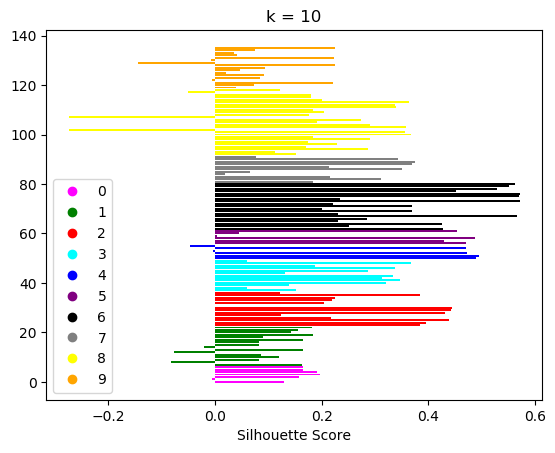

In [868]:
#Plot the silhouette
random.seed(37)
clusters = cluster.cluster_by_partitioning(active_sites_list,10)
sites = []
colors = []
color_choices = ["magenta","green","red","cyan","blue","purple","black","grey","yellow","orange"]
i =0
for cluster in clusters:
    sites = sites + cluster
    colors = colors + [color_choices[i]]*len(cluster)
    i = i+1
sil_vector = []

for i in sites:
    sil_vector.append(silhouette(i,clusters,136))

plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(range(136), sil_vector, color=colors)
ax.set_xlabel('Silhouette Score')
ax.set_title('k = 10')
print(np.mean(sil_vector))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in dic_colors.values()]
plt.legend(markers, dic_colors.keys(), numpoints=1)
plt.show()

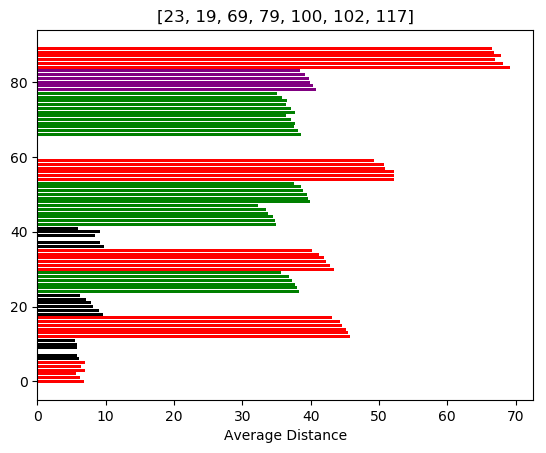

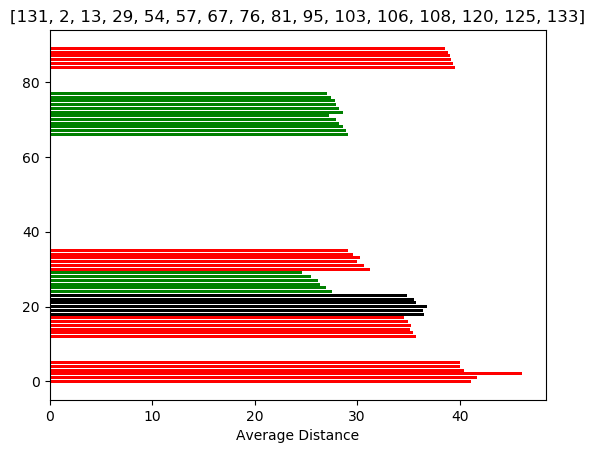

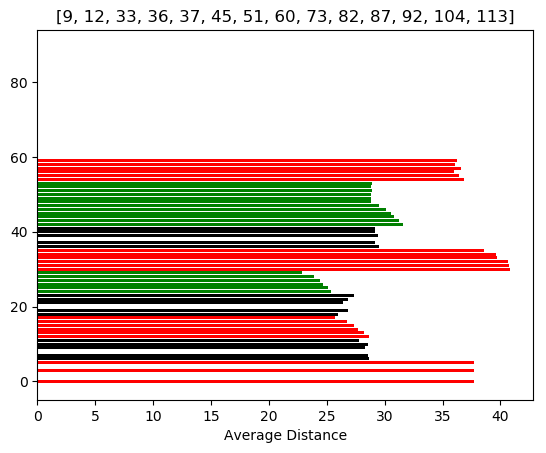

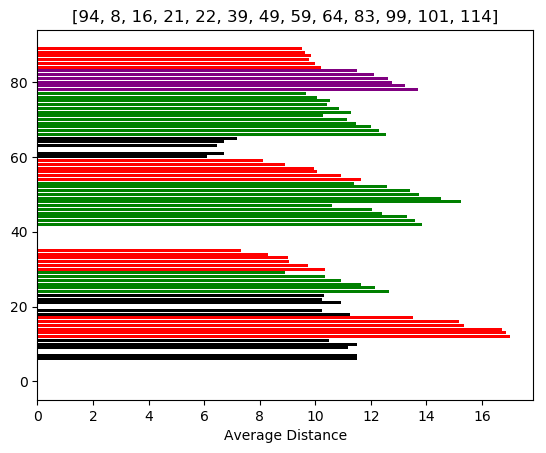

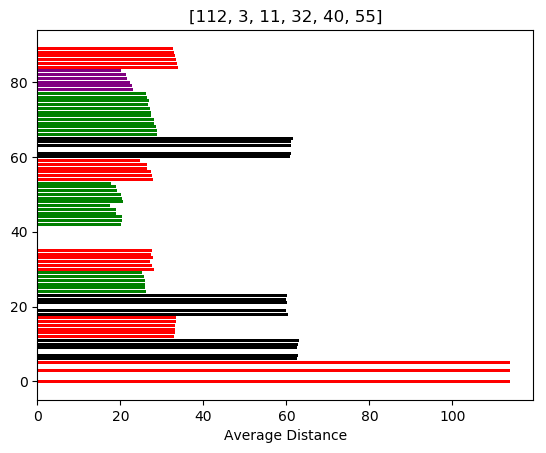

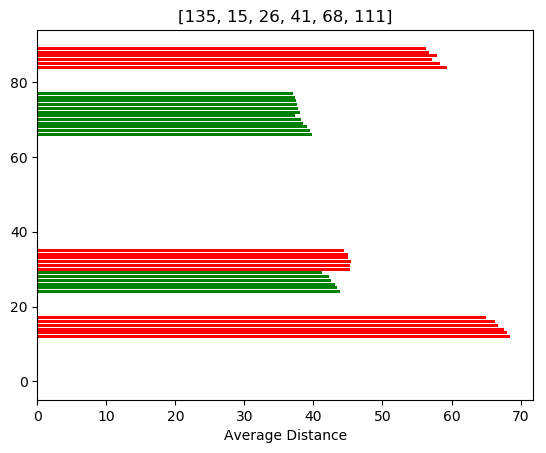

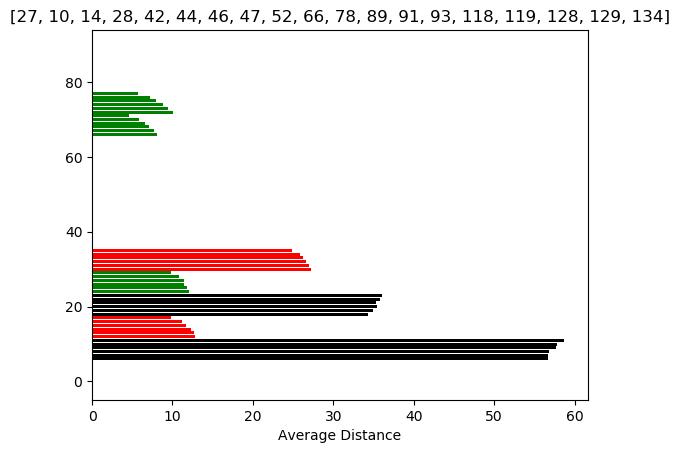

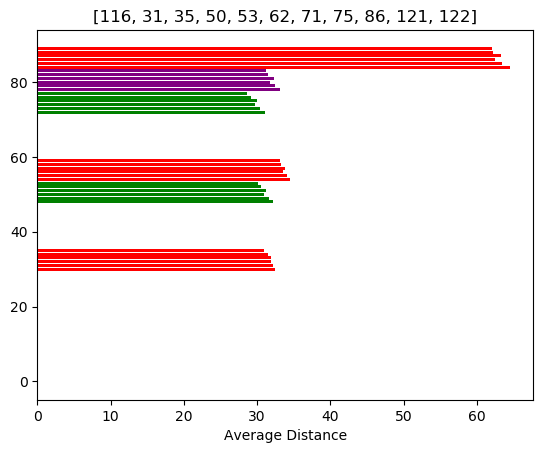

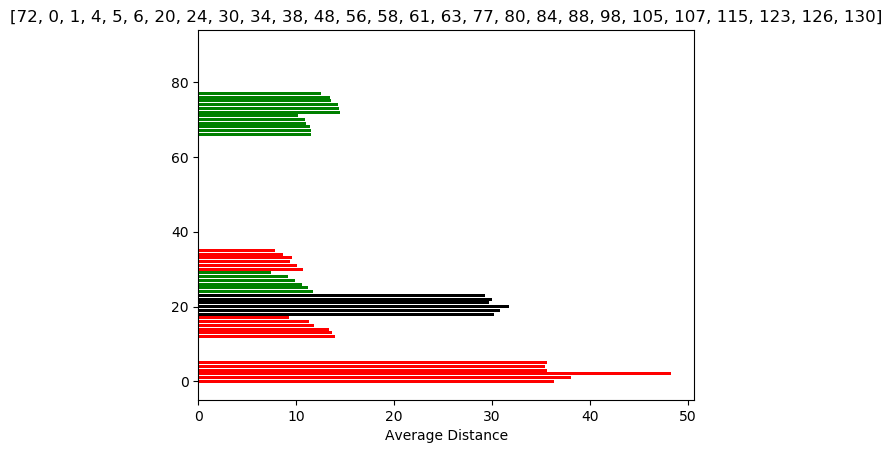

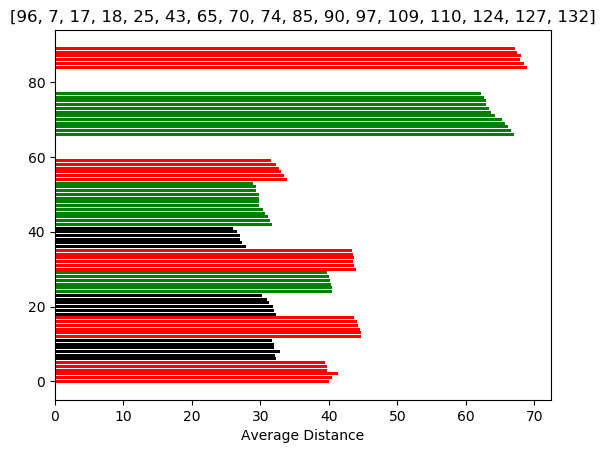

In [716]:
#Plot graphs to define clusters for partitioning clustering
for cluster in clusters:
    average_distance = [0]*90
    distance_list = [[]]*90
    for site in cluster:
        i = 0
        for distance in distance_types:
            if active_sites_list[site].distances[distance] != []:
                distance_list[i] = distance_list[i] + [np.mean(active_sites_list[site].distances[distance])]
            i = i+1
        #print(len(distance_list))
    for index in range(90):
        #print(distance[index])
        if distance_list[index] == []:
            average_distance[index] = 0
        else:
            average_distance[index] = np.mean(distance_list[index])
    plt.rcdefaults()
    fig, ax = plt.subplots()
    colors = ["red"]*6 +["black"]*6+["red"]*6+["black"]*6+["green"]*6+["red"]*6+["black"]*6+["green"]*6+["green"]*6+["red"]*6+["black"]*6+["green"]*6+["green"]*6+["purple"]*6+["red"]*6
    ax.barh(range(90), average_distance, color=colors)
    ax.set_xlabel('Average Distance')
    ax.set_title(cluster)
    plt.show()

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


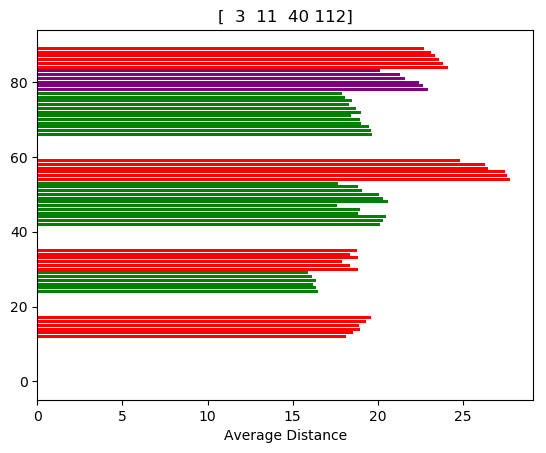

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


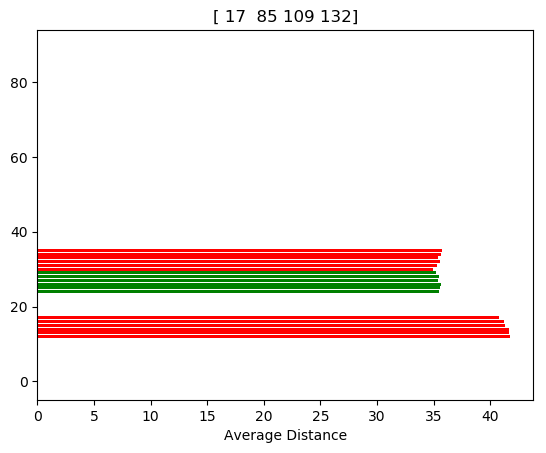

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


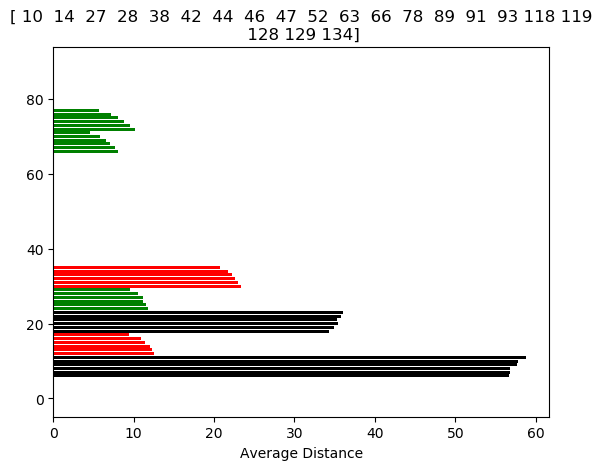

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


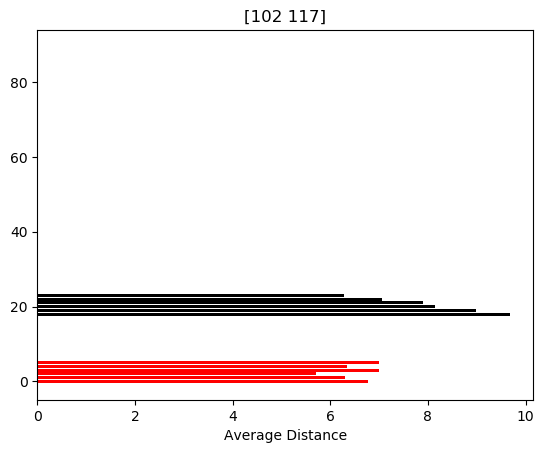

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


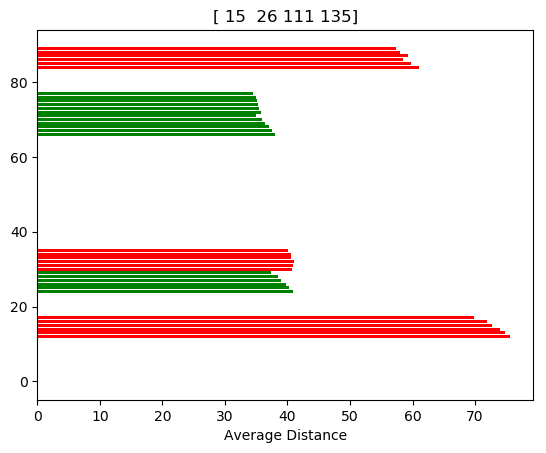

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


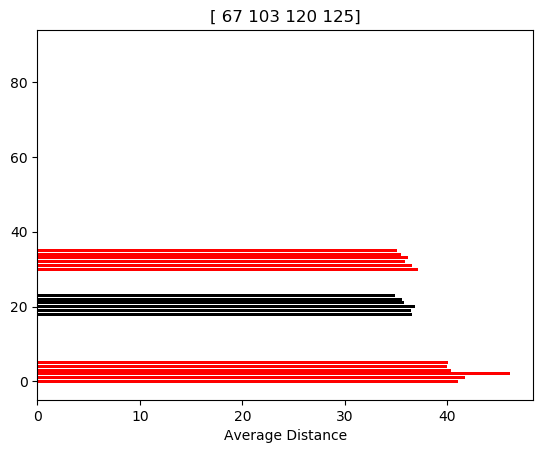

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


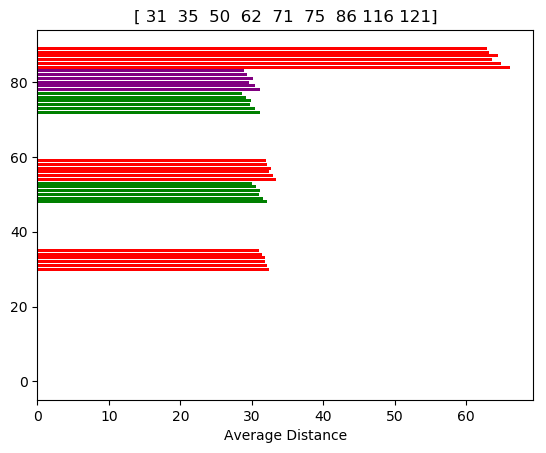

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


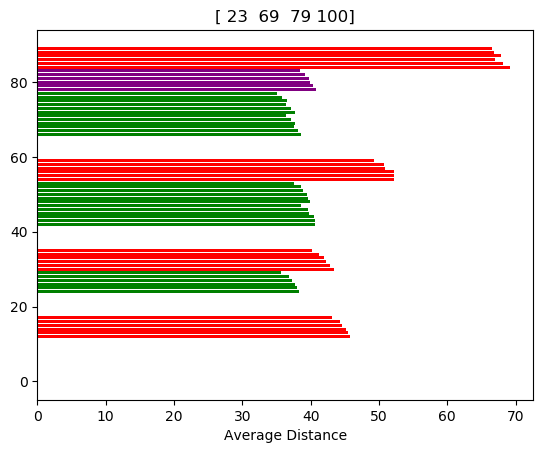

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


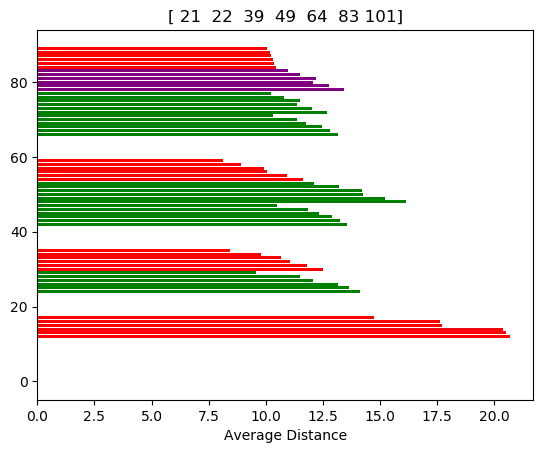

/Applications/EMAN2/envs/hw2/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


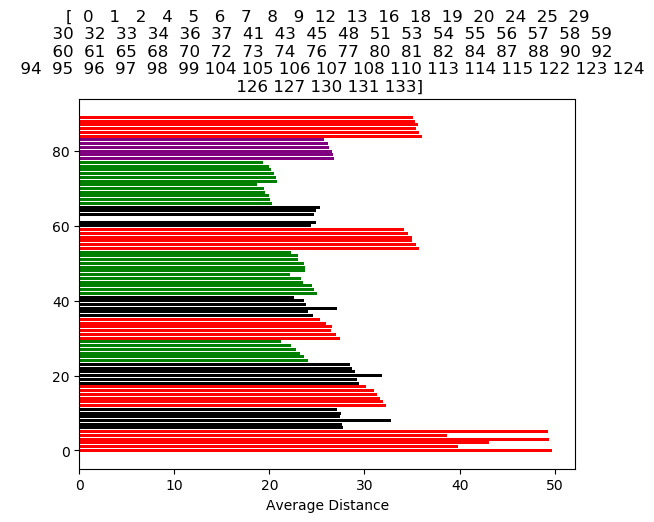

In [870]:
#Plot graphs to define clusters for hierarchical clustering
test = cluster_hierarchically(active_sites_list,1.49)
for cluster in test:
    average_distance = [0]*90
    distance_list = [[]]*90
    for site in cluster:
        i = 0
        for distance in distance_types:
            if active_sites_list[site].distances[distance] != []:
                distance_list[i] = distance_list[i] + [np.mean(active_sites_list[site].distances[distance])]
            i = i+1
        #print(len(distance_list))
    for index in range(90):
        #print(distance[index])
        if distance_list[index] == []:
            average_distance[index] = 0
        else:
            average_distance[index] = np.mean(distance_list[index])
    plt.rcdefaults()
    fig, ax = plt.subplots()
    colors = ["red"]*6 +["black"]*6+["red"]*6+["black"]*6+["green"]*6+["red"]*6+["black"]*6+["green"]*6+["green"]*6+["red"]*6+["black"]*6+["green"]*6+["green"]*6+["purple"]*6+["red"]*6
    ax.barh(range(90), average_distance, color=colors)
    #ax.set_yticks(range(136))
    #ax.set_yticklabels(sites)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Average Distance')
    ax.set_title(cluster)
    plt.show()

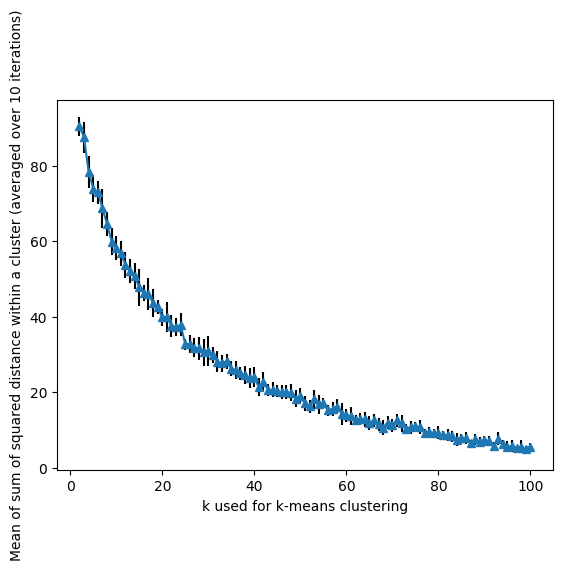

In [635]:
#Plot Elbow Plot
k_values, sse_values, sse_std = evaluate_k(active_sites_list,2,100,10)
plt.errorbar(x=k_values, y=sse_values, yerr = sse_std, marker='^', ecolor = "black")

plt.xlabel('k used for k-means clustering') 
plt.ylabel('Mean of sum of squared distance within a cluster (averaged over 10 iterations)')
plt.show()

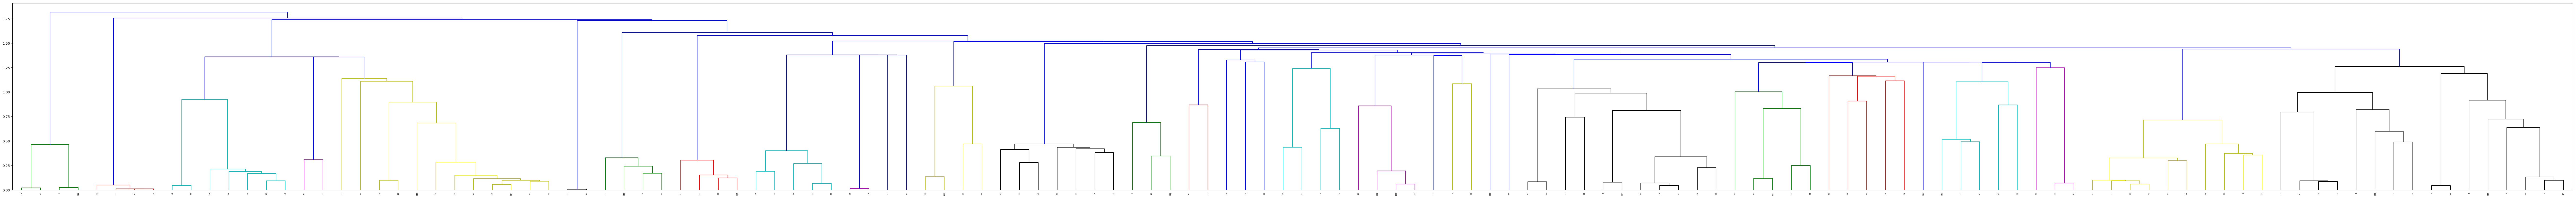

In [726]:
#Converts distance matrix to an upper triangular matrix
y = pdist(d)
#Computes a dendogram for the sites using single linkage as the cluster combining metric
#This is an agglomerative clustering meaning it is using a bottom up approach
#First every site is assigned to its own cluster. Then each cluster is combined with the cluster it is cloesest to
#based on the single linkage distance metric. For thi smetric, the distance between two clusters is defined as
#the shortest distance between an element in the first cluster and an element in the second cluster. This process
#is iteratively repested until there is one cluster

Z = single(y)

plt.show()
#I made a better versin of this plot at the bottom of the notebook


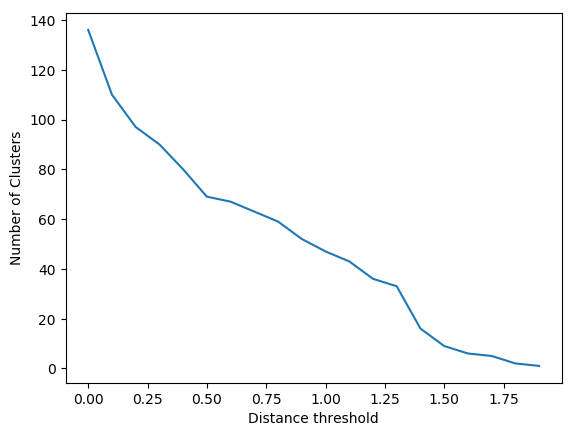

In [744]:
#Plot number of clusters for different distance thresholds
t_values = np.arange(0, 2, 0.1)
no_clusters = []
for i in t_values:
    no_clusters.append(len(np.unique(fcluster(Z, t=i, criterion='distance'))))
plt.plot(t_values, no_clusters)
plt.xlabel('Distance threshold') 
plt.ylabel('Number of Clusters')
plt.show()

In [777]:
#Calculate MDS dimensionality reduction
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
embedding = MDS(n_components=2,dissimilarity = 'precomputed')
X_transformed = embedding.fit_transform(d)
#Calculate MDS distance matrix
d_mds = np.zeros((136,136))
             
for i in range(136):
    for j in range(i,136):
        d_mds[i,j] = ((x_dist[i] - x_dist[j])**2 + (y_dist[i] - y_dist[j])**2)**0.5
        d_mds[j,i] = d_mds[i,j]


In [857]:
#Caclulate variance explained by MDS
np.corrcoef(pdist(d_mds),pdist(d))[0,1]**2

0.3307785014388121

0.22440643022887782


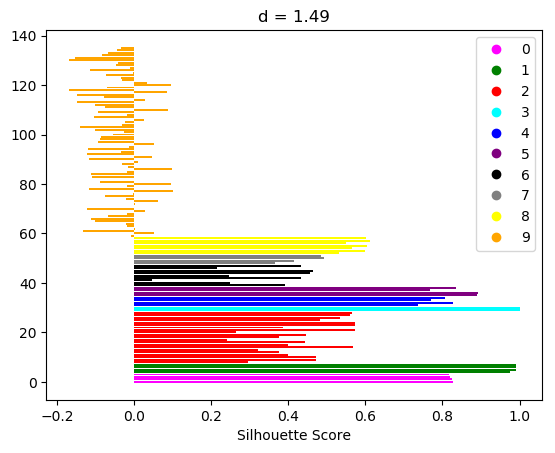

In [866]:
#Plot silhouette plot for hierarchical clustering
test = cluster_hierarchically(active_sites_list,1.49)
sites = []
colors = []
color_choices = ["magenta","green","red","cyan","blue","purple","black","grey","yellow","orange"]
i =0
for cluster in test:
    sites = sites + list(cluster)
    colors = colors + [color_choices[i]]*len(cluster)
    i = i+1
sil_vector = []

for i in sites:
    sil_vector.append(silhouette(i,test,136))

plt.rcdefaults()
fig, ax = plt.subplots()
#colors = ['green']*len(clusters[0]) + ['blue']*len(clusters[1])

ax.barh(range(136), sil_vector, color=colors)
#ax.set_yticks(range(136))
#ax.set_yticklabels(sites)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Silhouette Score')
ax.set_title('d = 1.49')
print(np.mean(sil_vector))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in dic_colors.values()]
plt.legend(markers, dic_colors.keys(), numpoints=1)
plt.show()

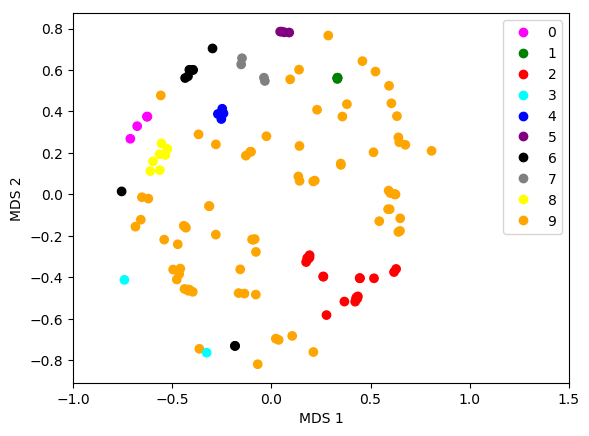

In [842]:
#Plot MDS for hierarchical clustering
test = cluster_hierarchically(active_sites_list,1.49)
dic_colors = {}
dic_colors[0] = "magenta"
dic_colors[1] = "green"
dic_colors[2] = "red"
dic_colors[3] = "cyan"
dic_colors[4] = "blue"
dic_colors[5] = "purple"
dic_colors[6] = "black"
dic_colors[7] = "grey"
dic_colors[8] = "yellow"
dic_colors[9] = "orange"

colors = []
#cluster_ids = []
j = np.array(range(len(test)))
for i in range(136):
    test_id = [i in x for x in test]
    cluster_id = j[test_id]
    #cluster_ids.append(cluster_id[0])
    colors.append(dic_colors[cluster_id[0]])
    
x_dist = [x[0] for x in X_transformed]
y_dist = [x[1] for x in X_transformed]
plt.scatter(x_dist, y_dist, c = colors) #label=str(cluster_ids[i]))
plt.xlabel('MDS 1') 
plt.ylabel('MDS 2')
plt.xlim(-1, 1.5)
#plt.legend()

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in dic_colors.values()]
plt.legend(markers, dic_colors.keys(), numpoints=1)
plt.show()


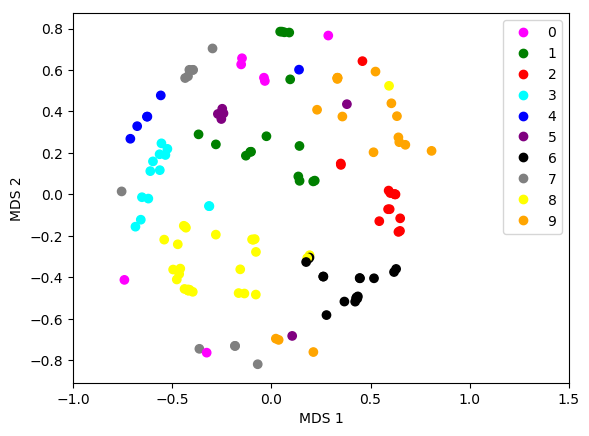

In [843]:
#Plot MDS for partitioning clustering
random.seed(37)
clusters, centroids = cluster_by_partitioning(active_sites_list,10)
dic_colors = {}
dic_colors[0] = "magenta"
dic_colors[1] = "green"
dic_colors[2] = "red"
dic_colors[3] = "cyan"
dic_colors[4] = "blue"
dic_colors[5] = "purple"
dic_colors[6] = "black"
dic_colors[7] = "grey"
dic_colors[8] = "yellow"
dic_colors[9] = "orange"

colors = []
#cluster_ids = []
j = np.array(range(len(clusters)))
for i in range(136):
    test_id = [i in x for x in clusters]
    cluster_id = j[test_id]
    #cluster_ids.append(cluster_id[0])
    colors.append(dic_colors[cluster_id[0]])
    
x_dist = [x[0] for x in X_transformed]
y_dist = [x[1] for x in X_transformed]
plt.scatter(x_dist, y_dist, c = colors) #label=str(cluster_ids[i]))
plt.xlabel('MDS 1') 
plt.ylabel('MDS 2')
plt.xlim(-1, 1.5)
#plt.legend()

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in dic_colors.values()]
plt.legend(markers, dic_colors.keys(), numpoints=1)
plt.show()



In [846]:
#Create function to calculate rand index to define direction
def rand_index(clustering_a, clustering_b, n):
    same_ab = 0
    diff_ab = 0
    same_a_only = 0
    same_b_only = 0
    no_clust_a = np.array(range(len(clustering_a)))
    no_clust_b = np.array(range(len(clustering_b)))
    for i in range(n):
        for j in range((i+1),n):
            #Assign cluster id to i from clustering a
            test_id_i_1 = [i in x for x in clustering_a]
            id_i_1 = no_clust_a[test_id]
            #Assign cluster id to i from clustering b
            test_id_i_2 = [i in x for x in clustering_b]
            id_i_2 = no_clust_b[test_id_i_2]
            #Assign cluster id to j from clustering a
            test_id_j_1 = [j in x for x in clustering_a]
            id_j_1 = no_clust_a[test_id_j_1]
            #Assign cluster id to j from clustering b
            test_id_j_2 = [j in x for x in clustering_b]
            id_j_2 = no_clust_b[test_id_j_2]
            if id_i_1 == id_j_1:
                if id_i_2 == id_j_2:
                    same_ab = same_ab +1
                else:
                    same_a_only = same_a_only + 1
            else:
                if id_i_2 == id_j_2:
                    same_b_only = same_b_only + 1
                else:
                    diff_ab = diff_ab + 1
    total = same_ab + diff_ab + same_a_only + same_b_only
    R = (same_ab + diff_ab)/total
    return R, total
                

In [847]:
#Calculate Rand Index
rand_index(clusters, test,136)

(0.6206971677559913, 9180)

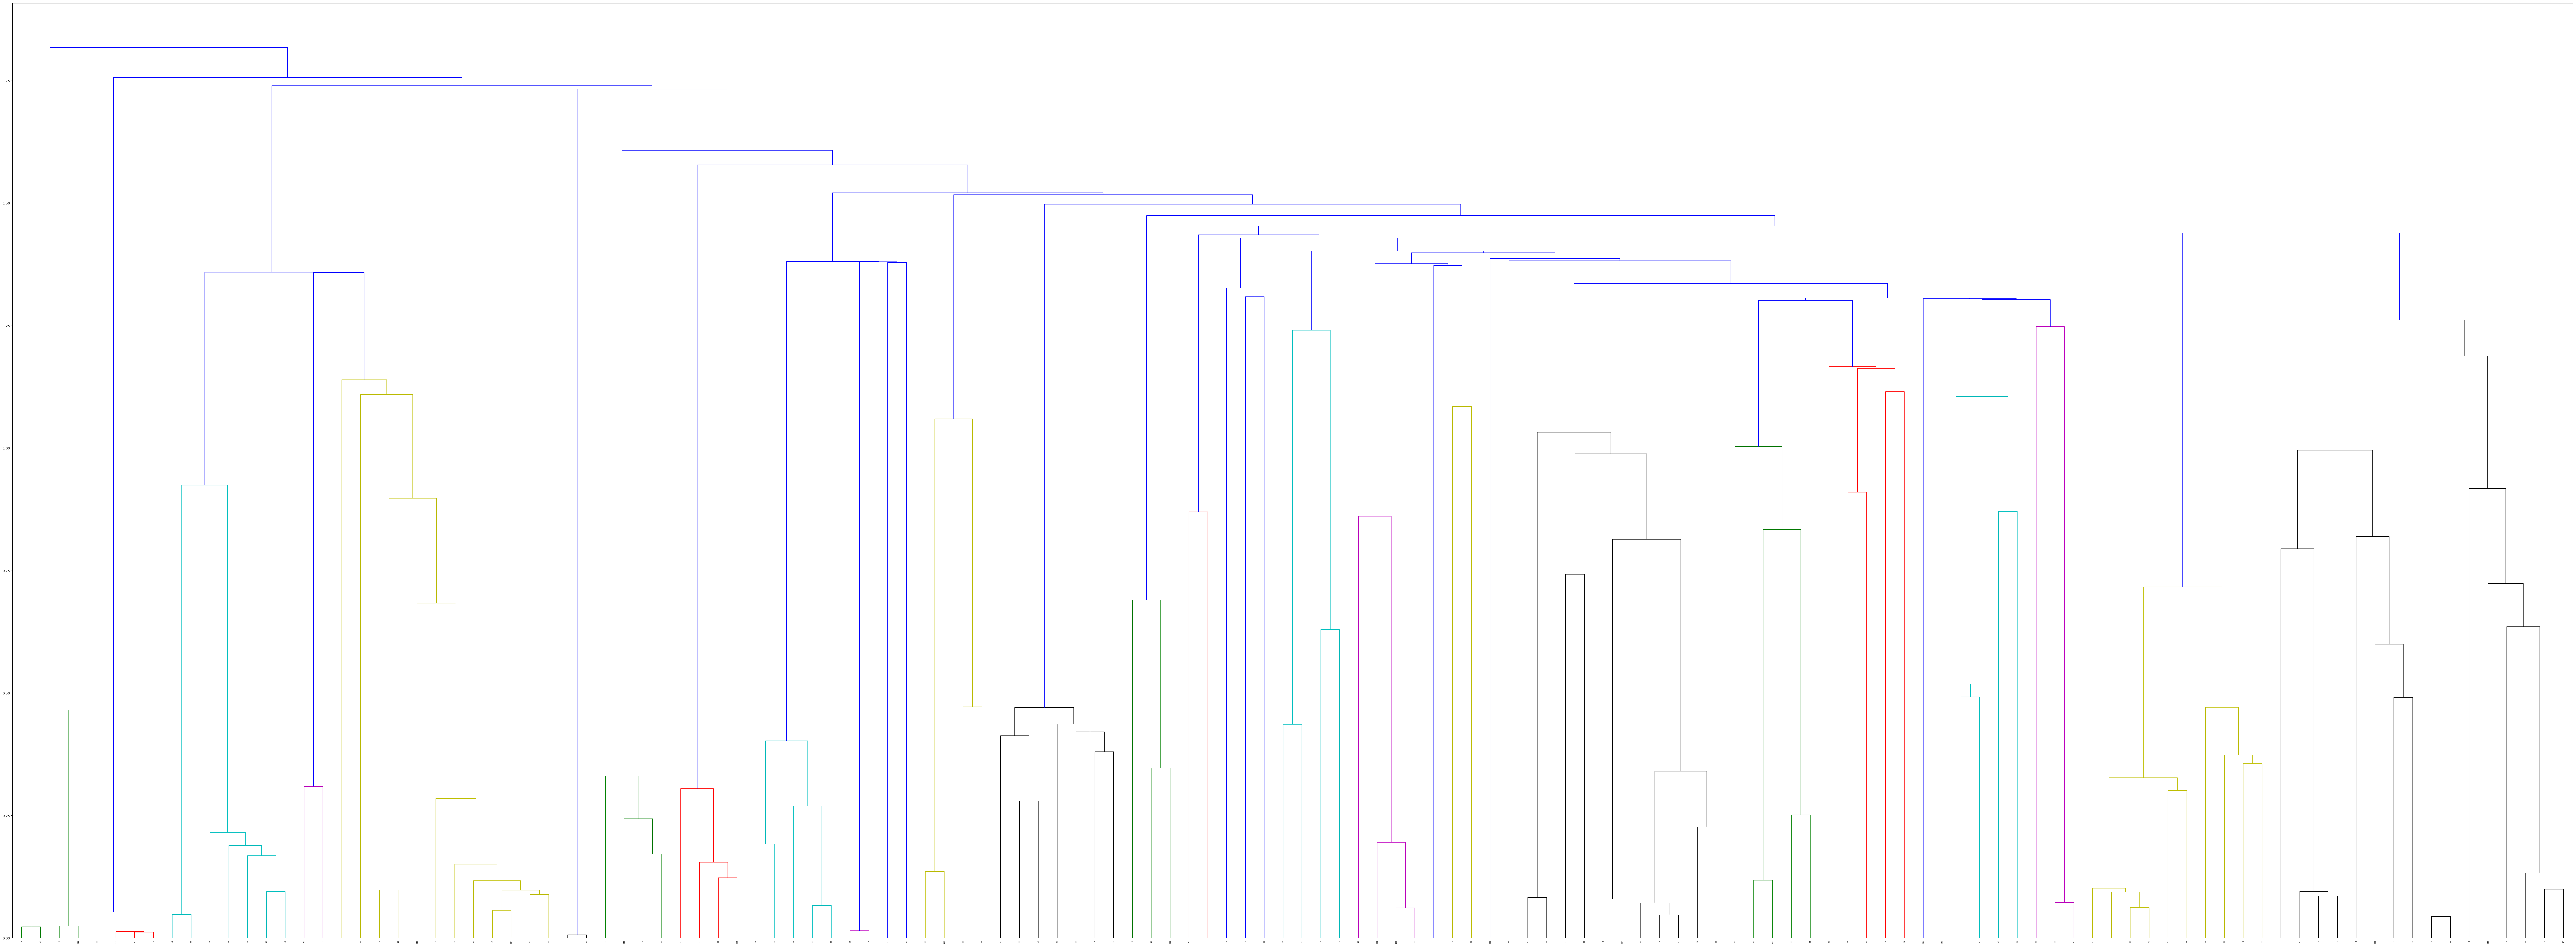

In [728]:
fig = plt.figure(figsize=(136, 50))
dn = dendrogram(Z)
plt.show()